In [1]:
from astropy.table import Table, join, Column, setdiff
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np
from scipy import stats
from scipy.stats import spearmanr, pearsonr, kendalltau
import bottleneck as bn
rayleigh = stats.rayleigh

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, NullFormatter
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

In [2]:
r2o = Table.read("../data/postfit-r2o-offset.fits")

In [3]:
# Gaia DR2 photometric information
from my_progs.catalog.read_gaia import read_dr2_iers

gdr2 = read_dr2_iers()

gdr2.keep_columns(["iers_name", "source_id",
                   "parallax", "parallax_err",
                   "pmra", "pmra_err", "pmdec", "pmdec_err",
                   "astrometric_n_obs_al", "astrometric_matched_observations",
                   "phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag", "bp_rp"])

gdr2.rename_columns(["astrometric_n_obs_al", "astrometric_matched_observations",
                     "phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag"],
                    ["n_obs_al", "n_matched_obs", "g_mag", "bp_mag", "rp_mag"])

r2o = join(r2o, gdr2, keys="iers_name", table_names=["", "g"])

# Source sturecture index

In [52]:
sitab = Table.read("../data/SI.fits")

r2o_si = join(r2o, sitab, keys="iers_name")
r2o_nsi = setdiff(r2o, sitab, keys="iers_name")

print("We found SI for {:d} sources.".format(len(r2o_si)))

We found SI for 142 sources.


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  4.,  1.,  4.,  4.,  7.,  6.,  7., 12.,
         8.,  9.,  5., 13., 10., 13., 16.,  8.,  3.,  3.,  1.,  2.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
 <a list of 50 Patch objects>)

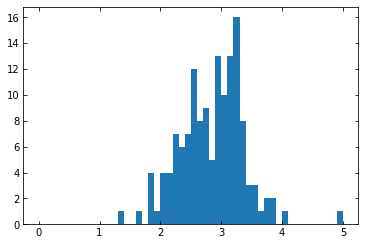

In [53]:
plt.hist(r2o_si["SI"], np.arange(0, 5.1, 0.1))

In [54]:
r2o_si.sort("SI")
number = np.arange(len(r2o_si))
nb_bin = np.trunc(number / 15)
r2o_si = Table(r2o_si)
r2o_si.keep_columns(["SI", "ang_sep_g1", "ang_sep_k_g1", "ang_sep_ka_g1",
                     "nor_sep_g1", "nor_sep_k_g1", "nor_sep_ka_g1"])

dat_grouped = r2o_si.group_by(nb_bin)
dat_bin = dat_grouped.groups.aggregate(np.median)

In [55]:
# Calculate the correlation of radio-to-optical offset and SI (raw data)
# Pearson
r_rho_si_x = pearsonr(r2o_si["SI"], r2o_si["ang_sep_g1"])
r_rho_si_k = pearsonr(r2o_si["SI"], r2o_si["ang_sep_k_g1"])
r_rho_si_ka = pearsonr(r2o_si["SI"], r2o_si["ang_sep_ka_g1"])

# Spearman
rs_rho_si_x = spearmanr(r2o_si["SI"], r2o_si["ang_sep_g1"])
rs_rho_si_k = spearmanr(r2o_si["SI"], r2o_si["ang_sep_k_g1"])
rs_rho_si_ka = spearmanr(r2o_si["SI"], r2o_si["ang_sep_ka_g1"])

# kendall
tau_rho_si_x = kendalltau(r2o_si["SI"], r2o_si["ang_sep_g1"])
tau_rho_si_k = kendalltau(r2o_si["SI"], r2o_si["ang_sep_k_g1"])
tau_rho_si_ka = kendalltau(r2o_si["SI"], r2o_si["ang_sep_ka_g1"])

In [56]:
# Calculate the correlation of normalized radio-to-optical offset and G-mag (raw data)
# Pearson
r_X_si_x = pearsonr(r2o_si["SI"], r2o_si["nor_sep_g1"])
r_X_si_k = pearsonr(r2o_si["SI"], r2o_si["nor_sep_k_g1"])
r_X_si_ka = pearsonr(r2o_si["SI"], r2o_si["nor_sep_ka_g1"])

# Spearman
rs_X_si_x = spearmanr(r2o_si["SI"], r2o_si["nor_sep_g1"])
rs_X_si_k = spearmanr(r2o_si["SI"], r2o_si["nor_sep_k_g1"])
rs_X_si_ka = spearmanr(r2o_si["SI"], r2o_si["nor_sep_ka_g1"])

# kendall
tau_X_si_x = kendalltau(r2o_si["SI"], r2o_si["nor_sep_g1"])
tau_X_si_k = kendalltau(r2o_si["SI"], r2o_si["nor_sep_k_g1"])
tau_X_si_ka = kendalltau(r2o_si["SI"], r2o_si["nor_sep_ka_g1"])

In [57]:
# Calculate the correlation of radio-to-optical offset and G-mag (binned data)
# Pearson
r_rho_si_x_bin = pearsonr(dat_bin["SI"], dat_bin["ang_sep_g1"])
r_rho_si_k_bin = pearsonr(dat_bin["SI"], dat_bin["ang_sep_k_g1"])
r_rho_si_ka_bin = pearsonr(dat_bin["SI"], dat_bin["ang_sep_ka_g1"])

# Spearman
rs_rho_si_x_bin = spearmanr(dat_bin["SI"], dat_bin["ang_sep_g1"])
rs_rho_si_k_bin = spearmanr(dat_bin["SI"], dat_bin["ang_sep_k_g1"])
rs_rho_si_ka_bin = spearmanr(dat_bin["SI"], dat_bin["ang_sep_ka_g1"])

# kendall
tau_rho_si_x_bin = kendalltau(dat_bin["SI"], dat_bin["ang_sep_g1"])
tau_rho_si_k_bin = kendalltau(dat_bin["SI"], dat_bin["ang_sep_k_g1"])
tau_rho_si_ka_bin = kendalltau(dat_bin["SI"], dat_bin["ang_sep_ka_g1"])

In [58]:
# Calculate the correlation of normalized radio-to-optical offset and G-mag (binned data)
# Pearson
r_X_si_x_bin = pearsonr(dat_bin["SI"], dat_bin["nor_sep_g1"])
r_X_si_k_bin = pearsonr(dat_bin["SI"], dat_bin["nor_sep_k_g1"])
r_X_si_ka_bin = pearsonr(dat_bin["SI"], dat_bin["nor_sep_ka_g1"])

# Spearman
rs_X_si_x_bin = spearmanr(dat_bin["SI"], dat_bin["nor_sep_g1"])
rs_X_si_k_bin = spearmanr(dat_bin["SI"], dat_bin["nor_sep_k_g1"])
rs_X_si_ka_bin = spearmanr(dat_bin["SI"], dat_bin["nor_sep_ka_g1"])

# kendall
tau_X_si_x_bin = kendalltau(dat_bin["SI"], dat_bin["nor_sep_g1"])
tau_X_si_k_bin = kendalltau(dat_bin["SI"], dat_bin["nor_sep_k_g1"])
tau_X_si_ka_bin = kendalltau(dat_bin["SI"], dat_bin["nor_sep_ka_g1"])

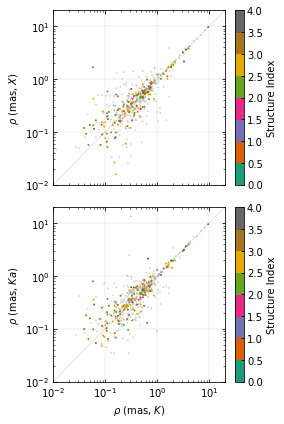

In [59]:
# Distribution of angular separation vs SI
fig, (ax0, ax1) = plt.subplots(figsize=(4, 6), nrows=2, sharex=True, sharey=True)

xmin, xmax = 0.01, 20
ax0.set_xlim([xmin, xmax])
ax0.set_ylim([xmin, xmax])

x = np.linspace(xmin, xmax, 100)
ax0.plot(x, x, lw=0.1, color="k")
ax1.plot(x, x, lw=0.1, color="k")

r2o_si.sort("SI")
ax0.scatter(r2o_nsi["ang_sep_k_g1"], r2o_nsi["ang_sep_g1"], marker="^", 
            s=2, facecolors="None", edgecolors="grey", lw=0.2)
sc0 = ax0.scatter(r2o_si["ang_sep_k_g1"], r2o_si["ang_sep_g1"], c=r2o_si["SI"],
                  s=1, vmin=0, vmax=4, cmap="Dark2")
plt.colorbar(sc0, label="Structure Index", fraction=0.1, ax=ax0, ticks=[0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4])

ax1.scatter(r2o_nsi["ang_sep_k_g1"], r2o_nsi["ang_sep_ka_g1"], marker="^", 
            s=2, facecolors="None", edgecolors="grey", lw=0.2)
sc1 = ax1.scatter(r2o_si["ang_sep_k_g1"], r2o_si["ang_sep_ka_g1"], c=r2o_si["SI"],
                  s=1, vmin=0, vmax=4, cmap="Dark2")
plt.colorbar(sc1, label="Structure Index", fraction=0.1, ax=ax1, ticks=[0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4])

ax0.set_ylabel("$\\rho$ (mas, $X$)")
ax1.set_xlabel("$\\rho$ (mas, $K$)")
ax1.set_ylabel("$\\rho$ (mas, $Ka$)")

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")

ax0.grid(lw=0.2)
ax1.grid(lw=0.2)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig("../plots/rho-com-vs-si.eps", hbox="tight")

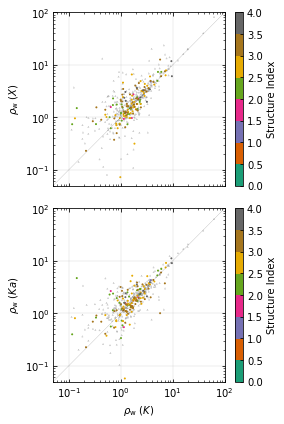

In [60]:
# Distribution of normalized separation vs SI
fig, (ax0, ax1) = plt.subplots(figsize=(4, 6), nrows=2, sharex=True, sharey=True)

xmin, xmax = 0.05, 100
ax0.set_xlim([xmin, xmax])
ax0.set_ylim([xmin, xmax])

x = np.linspace(xmin, xmax, 100)
ax0.plot(x, x, lw=0.1, color="k")
ax1.plot(x, x, lw=0.1, color="k")

r2o_si.sort("SI")

ax0.scatter(r2o_nsi["nor_sep_k_g1"], r2o_nsi["nor_sep_g1"], marker="^", 
            s=2, facecolors="None", edgecolors="grey", lw=0.2)
sc0 = ax0.scatter(r2o_si["nor_sep_k_g1"], r2o_si["nor_sep_g1"], c=r2o_si["SI"],
                  s=1, vmin=0, vmax=4, cmap="Dark2")
plt.colorbar(sc0, label="Structure Index", fraction=0.1, ax=ax0, ticks=[0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4])

ax1.scatter(r2o_nsi["nor_sep_k_g1"], r2o_nsi["nor_sep_ka_g1"], marker="^", 
            s=2, facecolors="None", edgecolors="grey", lw=0.2)
sc1 = ax1.scatter(r2o_si["nor_sep_k_g1"], r2o_si["nor_sep_ka_g1"], c=r2o_si["SI"],
                  s=1, vmin=0, vmax=4, cmap="Dark2")
plt.colorbar(sc1, label="Structure Index", fraction=0.1, ax=ax1, ticks=[0, 0.5, 1.0, 1.5, 2, 2.5, 3, 3.5, 4])

ax0.set_ylabel("$\\rho_{\\rm w}$ ($X$)")
ax1.set_xlabel("$\\rho_{\\rm w}$ ($K$)")
ax1.set_ylabel("$\\rho_{\\rm w}$ ($Ka$)")

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")

ax0.grid(lw=0.2)
ax1.grid(lw=0.2)

plt.subplots_adjust()
plt.tight_layout()
plt.savefig("../plots/X-com-vs-si.eps", hbox="tight")
# plt.savefig("../plots/X-com-vs-si.png", hbox="tight")

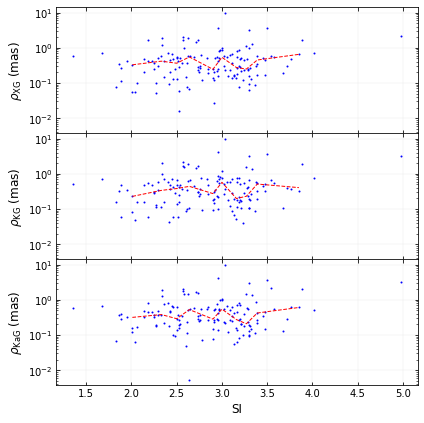

In [61]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=3, sharex=True, sharey=True)

ax0.plot(r2o_si["SI"], r2o_si["ang_sep_g1"], ".", ms=2, mfc=None, mec="b", lw=0.1)
ax1.plot(r2o_si["SI"], r2o_si["ang_sep_k_g1"], ".", ms=2, mfc=None, mec="b", lw=0.1)
ax2.plot(r2o_si["SI"], r2o_si["ang_sep_ka_g1"], ".", ms=2, mfc=None, mec="b", lw=0.1)

ax0.plot(dat_bin["SI"], dat_bin["ang_sep_g1"], "r--", lw=1)
ax1.plot(dat_bin["SI"], dat_bin["ang_sep_k_g1"], "r--", lw=1)
ax2.plot(dat_bin["SI"], dat_bin["ang_sep_ka_g1"], "r--", lw=1)

# ax0.set_xlim([0, 5.2])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax1.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax2.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax2.set_xlabel("SI", fontsize=12)

ax0.set_yscale("log")
ax1.set_yscale("log")

ax0.grid(lw=0.1)
ax1.grid(lw=0.1)
ax2.grid(lw=0.1)

plt.tight_layout()
plt.subplots_adjust(hspace=0)

plt.savefig("../plots/rho-si.eps", hbox="tight")

# Tabulate the correlation

In [62]:
var = np.array(["G", "z", "SI",
                "MI-B1", "MI-B2", "MI-B3",
                "MI-R1", "MI-R2", "MI-R3",
                "MI-IR1", "MI-IR2", "MI-IR3"])

## $\rho$

In [63]:
# Reshape the results
# Pearson
r_rho_x = np.array([r_rho_g_x[0], r_rho_z_x[0], r_rho_si_x[0],
                    r_rho_mib1_x[0], r_rho_mib2_x[0], r_rho_mib3_x[0],
                    r_rho_mir1_x[0], r_rho_mir2_x[0], r_rho_mir3_x[0],
                    r_rho_mii1_x[0], r_rho_mii2_x[0], r_rho_mii3_x[0]])
r_rho_k = np.array([r_rho_g_k[0], r_rho_z_k[0], r_rho_si_k[0],
                    r_rho_mib1_k[0], r_rho_mib2_k[0], r_rho_mib3_k[0],
                    r_rho_mir1_k[0], r_rho_mir2_k[0], r_rho_mir3_k[0],
                    r_rho_mii1_k[0], r_rho_mii2_k[0], r_rho_mii3_k[0]])
r_rho_ka = np.array([r_rho_g_ka[0], r_rho_z_ka[0], r_rho_si_ka[0],
                     r_rho_mib1_ka[0], r_rho_mib2_ka[0], r_rho_mib3_ka[0],
                     r_rho_mir1_ka[0], r_rho_mir2_ka[0], r_rho_mir3_ka[0],
                     r_rho_mii1_ka[0], r_rho_mii2_ka[0], r_rho_mii3_ka[0]])

rp_rho_x = np.array([r_rho_g_x[1], r_rho_z_x[1], r_rho_si_x[1],
                     r_rho_mib1_x[1], r_rho_mib2_x[1], r_rho_mib3_x[1],
                     r_rho_mir1_x[1], r_rho_mir2_x[1], r_rho_mir3_x[1],
                     r_rho_mii1_x[1], r_rho_mii2_x[1], r_rho_mii3_x[1]])
rp_rho_k = np.array([r_rho_g_k[1], r_rho_z_k[1], r_rho_si_k[1],
                     r_rho_mib1_k[1], r_rho_mib2_k[1], r_rho_mib3_k[1],
                     r_rho_mir1_k[1], r_rho_mir2_k[1], r_rho_mir3_k[1],
                     r_rho_mii1_k[1], r_rho_mii2_k[1], r_rho_mii3_k[1]])
rp_rho_ka = np.array([r_rho_g_ka[1], r_rho_z_ka[1], r_rho_si_ka[1],
                      r_rho_mib1_ka[1], r_rho_mib2_ka[1], r_rho_mib3_ka[1],
                      r_rho_mir1_ka[1], r_rho_mir2_ka[1], r_rho_mir3_ka[1],
                      r_rho_mii1_ka[1], r_rho_mii2_ka[1], r_rho_mii3_ka[1]])

# Spearman
rs_rho_x = np.array([rs_rho_g_x[0], rs_rho_z_x[0], rs_rho_si_x[0],
                     rs_rho_mib1_x[0], rs_rho_mib2_x[0], rs_rho_mib3_x[0],
                     rs_rho_mir1_x[0], rs_rho_mir2_x[0], rs_rho_mir3_x[0],
                     rs_rho_mii1_x[0], rs_rho_mii2_x[0], rs_rho_mii3_x[0]])
rs_rho_k = np.array([rs_rho_g_k[0], rs_rho_z_k[0], rs_rho_si_k[0],
                     rs_rho_mib1_k[0], rs_rho_mib2_k[0], rs_rho_mib3_k[0],
                     rs_rho_mir1_k[0], rs_rho_mir2_k[0], rs_rho_mir3_k[0],
                     rs_rho_mii1_k[0], rs_rho_mii2_k[0], rs_rho_mii3_k[0]])
rs_rho_ka = np.array([rs_rho_g_ka[0], rs_rho_z_ka[0], rs_rho_si_ka[0],
                      rs_rho_mib1_ka[0], rs_rho_mib2_ka[0], rs_rho_mib3_ka[0],
                      rs_rho_mir1_ka[0], rs_rho_mir2_ka[0], rs_rho_mir3_ka[0],
                      rs_rho_mii1_ka[0], rs_rho_mii2_ka[0], rs_rho_mii3_ka[0]])

rsp_rho_x = np.array([rs_rho_g_x[1], rs_rho_z_x[1], rs_rho_si_x[1],
                      rs_rho_mib1_x[1], rs_rho_mib2_x[1], rs_rho_mib3_x[1],
                      rs_rho_mir1_x[1], rs_rho_mir2_x[1], rs_rho_mir3_x[1],
                      rs_rho_mii1_x[1], rs_rho_mii2_x[1], rs_rho_mii3_x[1]])
rsp_rho_k = np.array([rs_rho_g_k[1], rs_rho_z_k[1], rs_rho_si_k[1],
                      rs_rho_mib1_k[1], rs_rho_mib2_k[1], rs_rho_mib3_k[1],
                      rs_rho_mir1_k[1], rs_rho_mir2_k[1], rs_rho_mir3_k[1],
                      rs_rho_mii1_k[1], rs_rho_mii2_k[1], rs_rho_mii3_k[1]])
rsp_rho_ka = np.array([rs_rho_g_ka[1], rs_rho_z_ka[1], rs_rho_si_ka[1],
                       rs_rho_mib1_ka[1], rs_rho_mib2_ka[1], rs_rho_mib3_ka[1],
                       rs_rho_mir1_ka[1], rs_rho_mir2_ka[1], rs_rho_mir3_ka[1],
                       rs_rho_mii1_ka[1], rs_rho_mii2_ka[1], rs_rho_mii3_ka[1]])


# Kendall
tau_rho_x = np.array([tau_rho_g_x[0], tau_rho_z_x[0], tau_rho_si_x[0],
                      tau_rho_mib1_x[0], tau_rho_mib2_x[0], tau_rho_mib3_x[0],
                      tau_rho_mir1_x[0], tau_rho_mir2_x[0], tau_rho_mir3_x[0],
                      tau_rho_mii1_x[0], tau_rho_mii2_x[0], tau_rho_mii3_x[0]])
tau_rho_k = np.array([tau_rho_g_k[0], tau_rho_z_k[0], tau_rho_si_k[0],
                      tau_rho_mib1_k[0], tau_rho_mib2_k[0], tau_rho_mib3_k[0],
                      tau_rho_mir1_k[0], tau_rho_mir2_k[0], tau_rho_mir3_k[0],
                      tau_rho_mii1_k[0], tau_rho_mii2_k[0], tau_rho_mii3_k[0]])
tau_rho_ka = np.array([tau_rho_g_ka[0], tau_rho_z_ka[0], tau_rho_si_ka[0],
                       tau_rho_mib1_ka[0], tau_rho_mib2_ka[0], tau_rho_mib3_ka[0],
                       tau_rho_mir1_ka[0], tau_rho_mir2_ka[0], tau_rho_mir3_ka[0],
                       tau_rho_mii1_ka[0], tau_rho_mii2_ka[0], tau_rho_mii3_ka[0]])

taup_rho_x = np.array([tau_rho_g_x[1], tau_rho_z_x[1], tau_rho_si_x[1],
                       tau_rho_mib1_x[1], tau_rho_mib2_x[1], tau_rho_mib3_x[1],
                       tau_rho_mir1_x[1], tau_rho_mir2_x[1], tau_rho_mir3_x[1],
                       tau_rho_mii1_x[1], tau_rho_mii2_x[1], tau_rho_mii3_x[1]])
taup_rho_k = np.array([tau_rho_g_k[1], tau_rho_z_k[1], tau_rho_si_k[1],
                       tau_rho_mib1_k[1], tau_rho_mib2_k[1], tau_rho_mib3_k[1],
                       tau_rho_mir1_k[1], tau_rho_mir2_k[1], tau_rho_mir3_k[1],
                       tau_rho_mii1_k[1], tau_rho_mii2_k[1], tau_rho_mii3_k[1]])
taup_rho_ka = np.array([tau_rho_g_ka[1], tau_rho_z_ka[1], tau_rho_si_ka[1],
                        tau_rho_mib1_ka[1], tau_rho_mib2_ka[1], tau_rho_mib3_ka[1],
                        tau_rho_mir1_ka[1], tau_rho_mir2_ka[1], tau_rho_mir3_ka[1],
                        tau_rho_mii1_ka[1], tau_rho_mii2_ka[1], tau_rho_mii3_ka[1]])

In [64]:
rho_cor_tab = Table([var,
                 r_rho_x, rp_rho_x, rs_rho_x, rsp_rho_x, tau_rho_x, taup_rho_x,
                 r_rho_k, rp_rho_k, rs_rho_k, rsp_rho_k, tau_rho_k, taup_rho_k,
                 r_rho_ka, rp_rho_ka, rs_rho_ka, rsp_rho_ka, tau_rho_ka, taup_rho_ka],
                names=["parameter",
                       "r_x", "rp_x", "rs_x", "rsp_x", "tau_x", "taup_x",
                       "r_k", "rp_k", "rs_k", "rsp_k", "tau_k", "taup_k",
                       "r_ka", "rp_ka", "rs_ka", "rsp_ka", "tau_ka", "taup_ka"])

# Format
rho_cor_tab["r_x"].format = "%+.1f"
rho_cor_tab["r_k"].format = "%+.1f"
rho_cor_tab["r_ka"].format = "%+.1f"

rho_cor_tab["rs_x"].format = "%+.1f"
rho_cor_tab["rs_k"].format = "%+.1f"
rho_cor_tab["rs_ka"].format = "%+.1f"

rho_cor_tab["tau_x"].format = "%+.1f"
rho_cor_tab["tau_k"].format = "%+.1f"
rho_cor_tab["tau_ka"].format = "%+.1f"

rho_cor_tab["rp_x"].format = "%.1e"
rho_cor_tab["rp_k"].format = "%.1e"
rho_cor_tab["rp_ka"].format = "%.1e"

rho_cor_tab["rsp_x"].format = "%.1e"
rho_cor_tab["rsp_k"].format = "%.1e"
rho_cor_tab["rsp_ka"].format = "%.1e"

rho_cor_tab["taup_x"].format = "%.1e"
rho_cor_tab["taup_k"].format = "%.1e"
rho_cor_tab["taup_ka"].format = "%.1e"

In [65]:
rho_cor_tab

parameter,r_x,rp_x,rs_x,rsp_x,tau_x,taup_x,r_k,rp_k,rs_k,rsp_k,tau_k,taup_k,r_ka,rp_ka,rs_ka,rsp_ka,tau_ka,taup_ka
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
G,+0.2,8.0e-08,+0.4,4.7e-21,+0.3,2.3e-21,+0.3,6.6e-09,+0.4,2.8e-25,+0.3,3.1e-25,+0.2,7.7e-07,+0.5,1.3e-27,+0.3,1.0e-26
z,-0.1,1.8e-01,+0.0,3.2e-01,+0.0,3.0e-01,-0.1,2.0e-01,+0.1,1.8e-01,+0.0,1.6e-01,-0.0,9.6e-01,+0.1,2.1e-01,+0.0,1.8e-01
SI,+0.1,1.3e-01,+0.1,1.8e-01,+0.1,1.7e-01,+0.2,4.7e-02,+0.1,1.6e-01,+0.1,1.9e-01,+0.2,4.8e-02,+0.0,5.9e-01,+0.0,5.9e-01
MI-B1,+0.0,9.7e-01,-0.0,9.4e-01,-0.0,9.4e-01,-0.0,9.2e-01,-0.0,5.7e-01,-0.0,5.5e-01,-0.0,9.2e-01,-0.0,8.9e-01,-0.0,8.5e-01
MI-B2,+0.0,7.6e-01,+0.1,2.4e-01,+0.1,2.8e-01,+0.0,6.8e-01,+0.1,2.1e-01,+0.1,2.5e-01,+0.0,6.1e-01,+0.1,7.5e-02,+0.1,8.9e-02
MI-B3,-0.0,8.4e-01,-0.0,5.5e-01,-0.0,5.8e-01,-0.0,9.7e-01,-0.0,8.1e-01,-0.0,8.1e-01,-0.0,7.7e-01,-0.1,4.5e-01,-0.0,5.0e-01
MI-R1,+0.1,4.1e-03,-0.0,7.4e-01,-0.0,7.3e-01,+0.2,2.3e-03,+0.0,6.2e-01,+0.0,6.0e-01,+0.1,5.6e-03,+0.1,1.8e-01,+0.0,1.8e-01
MI-R2,+0.1,2.1e-01,+0.1,3.4e-02,+0.1,3.4e-02,+0.1,2.6e-01,+0.1,1.3e-01,+0.1,1.3e-01,+0.0,5.9e-01,+0.0,4.1e-01,+0.0,4.1e-01
MI-R3,+0.1,7.4e-03,+0.2,1.8e-03,+0.1,1.7e-03,+0.1,9.3e-03,+0.1,3.7e-03,+0.1,3.8e-03,+0.1,1.3e-02,+0.2,2.0e-03,+0.1,1.8e-03


## X

In [66]:
# Reshape the results
# Pearson
r_X_x = np.array([r_X_g_x[0], r_X_z_x[0], r_X_si_x[0],
                  r_X_mib1_x[0], r_X_mib2_x[0], r_X_mib3_x[0],
                  r_X_mir1_x[0], r_X_mir2_x[0], r_X_mir3_x[0],
                  r_X_mii1_x[0], r_X_mii2_x[0], r_X_mii3_x[0]])
r_X_k = np.array([r_X_g_k[0], r_X_z_k[0], r_X_si_k[0],
                  r_X_mib1_k[0], r_X_mib2_k[0], r_X_mib3_k[0],
                  r_X_mir1_k[0], r_X_mir2_k[0], r_X_mir3_k[0],
                  r_X_mii1_k[0], r_X_mii2_k[0], r_X_mii3_k[0]])
r_X_ka = np.array([r_X_g_ka[0], r_X_z_ka[0], r_X_si_ka[0],
                   r_X_mib1_ka[0], r_X_mib2_ka[0], r_X_mib3_ka[0],
                   r_X_mir1_ka[0], r_X_mir2_ka[0], r_X_mir3_ka[0],
                   r_X_mii1_ka[0], r_X_mii2_ka[0], r_X_mii3_ka[0]])

rp_X_x = np.array([r_X_g_x[1], r_X_z_x[1], r_X_si_x[1],
                   r_X_mib1_x[1], r_X_mib2_x[1], r_X_mib3_x[1],
                   r_X_mir1_x[1], r_X_mir2_x[1], r_X_mir3_x[1],
                   r_X_mii1_x[1], r_X_mii2_x[1], r_X_mii3_x[1]])
rp_X_k = np.array([r_X_g_k[1], r_X_z_k[1], r_X_si_k[1],
                   r_X_mib1_k[1], r_X_mib2_k[1], r_X_mib3_k[1],
                   r_X_mir1_k[1], r_X_mir2_k[1], r_X_mir3_k[1],
                   r_X_mii1_k[1], r_X_mii2_k[1], r_X_mii3_k[1]])
rp_X_ka = np.array([r_X_g_ka[1], r_X_z_ka[1], r_X_si_ka[1],
                    r_X_mib1_ka[1], r_X_mib2_ka[1], r_X_mib3_ka[1],
                    r_X_mir1_ka[1], r_X_mir2_ka[1], r_X_mir3_ka[1],
                    r_X_mii1_ka[1], r_X_mii2_ka[1], r_X_mii3_ka[1]])

# Spearman
rs_X_x = np.array([rs_X_g_x[0], rs_X_z_x[0], rs_X_si_x[0],
                   rs_X_mib1_x[0], rs_X_mib2_x[0], rs_X_mib3_x[0],
                   rs_X_mir1_x[0], rs_X_mir2_x[0], rs_X_mir3_x[0],
                   rs_X_mii1_x[0], rs_X_mii2_x[0], rs_X_mii3_x[0]])
rs_X_k = np.array([rs_X_g_k[0], rs_X_z_k[0], rs_X_si_k[0],
                   rs_X_mib1_k[0], rs_X_mib2_k[0], rs_X_mib3_k[0],
                   rs_X_mir1_k[0], rs_X_mir2_k[0], rs_X_mir3_k[0],
                   rs_X_mii1_k[0], rs_X_mii2_k[0], rs_X_mii3_k[0]])
rs_X_ka = np.array([rs_X_g_ka[0], rs_X_z_ka[0], rs_X_si_ka[0],
                    rs_X_mib1_ka[0], rs_X_mib2_ka[0], rs_X_mib3_ka[0],
                    rs_X_mir1_ka[0], rs_X_mir2_ka[0], rs_X_mir3_ka[0],
                    rs_X_mii1_ka[0], rs_X_mii2_ka[0], rs_X_mii3_ka[0]])

rsp_X_x = np.array([rs_X_g_x[1], rs_X_z_x[1], rs_X_si_x[1],
                    rs_X_mib1_x[1], rs_X_mib2_x[1], rs_X_mib3_x[1],
                    rs_X_mir1_x[1], rs_X_mir2_x[1], rs_X_mir3_x[1],
                    rs_X_mii1_x[1], rs_X_mii2_x[1], rs_X_mii3_x[1]])
rsp_X_k = np.array([rs_X_g_k[1], rs_X_z_k[1], rs_X_si_k[1],
                    rs_X_mib1_k[1], rs_X_mib2_k[1], rs_X_mib3_k[1],
                    rs_X_mir1_k[1], rs_X_mir2_k[1], rs_X_mir3_k[1],
                    rs_X_mii1_k[1], rs_X_mii2_k[1], rs_X_mii3_k[1]])
rsp_X_ka = np.array([rs_X_g_ka[1], rs_X_z_ka[1], rs_X_si_ka[1],
                     rs_X_mib1_ka[1], rs_X_mib2_ka[1], rs_X_mib3_ka[1],
                     rs_X_mir1_ka[1], rs_X_mir2_ka[1], rs_X_mir3_ka[1],
                     rs_X_mii1_ka[1], rs_X_mii2_ka[1], rs_X_mii3_ka[1]])


# Kendall
tau_X_x = np.array([tau_X_g_x[0], tau_X_z_x[0], tau_X_si_x[0],
                    tau_X_mib1_x[0], tau_X_mib2_x[0], tau_X_mib3_x[0],
                    tau_X_mir1_x[0], tau_X_mir2_x[0], tau_X_mir3_x[0],
                    tau_X_mii1_x[0], tau_X_mii2_x[0], tau_X_mii3_x[0]])
tau_X_k = np.array([tau_X_g_k[0], tau_X_z_k[0], tau_X_si_k[0],
                    tau_X_mib1_k[0], tau_X_mib2_k[0], tau_X_mib3_k[0],
                    tau_X_mir1_k[0], tau_X_mir2_k[0], tau_X_mir3_k[0],
                    tau_X_mii1_k[0], tau_X_mii2_k[0], tau_X_mii3_k[0]])
tau_X_ka = np.array([tau_X_g_ka[0], tau_X_z_ka[0], tau_X_si_ka[0],
                     tau_X_mib1_ka[0], tau_X_mib2_ka[0], tau_X_mib3_ka[0],
                     tau_X_mir1_ka[0], tau_X_mir2_ka[0], tau_X_mir3_ka[0],
                     tau_X_mii1_ka[0], tau_X_mii2_ka[0], tau_X_mii3_ka[0]])

taup_X_x = np.array([tau_X_g_x[1], tau_X_z_x[1], tau_X_si_x[1],
                     tau_X_mib1_x[1], tau_X_mib2_x[1], tau_X_mib3_x[1],
                     tau_X_mir1_x[1], tau_X_mir2_x[1], tau_X_mir3_x[1],
                     tau_X_mii1_x[1], tau_X_mii2_x[1], tau_X_mii3_x[1]])
taup_X_k = np.array([tau_X_g_k[1], tau_X_z_k[1], tau_X_si_k[1],
                     tau_X_mib1_k[1], tau_X_mib2_k[1], tau_X_mib3_k[1],
                     tau_X_mir1_k[1], tau_X_mir2_k[1], tau_X_mir3_k[1],
                     tau_X_mii1_k[1], tau_X_mii2_k[1], tau_X_mii3_k[1]])
taup_X_ka = np.array([tau_X_g_ka[1], tau_X_z_ka[1], tau_X_si_ka[1],
                      tau_X_mib1_ka[1], tau_X_mib2_ka[1], tau_X_mib3_ka[1],
                      tau_X_mir1_ka[1], tau_X_mir2_ka[1], tau_X_mir3_ka[1],
                      tau_X_mii1_ka[1], tau_X_mii2_ka[1], tau_X_mii3_ka[1]])

In [67]:
X_cor_tab = Table([var,
                     r_X_x, rp_X_x, rs_X_x, rsp_X_x, tau_X_x, taup_X_x,
                     r_X_k, rp_X_k, rs_X_k, rsp_X_k, tau_X_k, taup_X_k,
                     r_X_ka, rp_X_ka, rs_X_ka, rsp_X_ka, tau_X_ka, taup_X_ka],
                    names=["parameter",
                           "r_x", "rp_x", "rs_x", "rsp_x", "tau_x", "taup_x",
                           "r_k", "rp_k", "rs_k", "rsp_k", "tau_k", "taup_k",
                           "r_ka", "rp_ka", "rs_ka", "rsp_ka", "tau_ka", "taup_ka"])

# Format
X_cor_tab["r_x"].format = "%+.1f"
X_cor_tab["r_k"].format = "%+.1f"
X_cor_tab["r_ka"].format = "%+.1f"

X_cor_tab["rs_x"].format = "%+.1f"
X_cor_tab["rs_k"].format = "%+.1f"
X_cor_tab["rs_ka"].format = "%+.1f"

X_cor_tab["tau_x"].format = "%+.1f"
X_cor_tab["tau_k"].format = "%+.1f"
X_cor_tab["tau_ka"].format = "%+.1f"

X_cor_tab["rp_x"].format = "%.1e"
X_cor_tab["rp_k"].format = "%.1e"
X_cor_tab["rp_ka"].format = "%.1e"

X_cor_tab["rsp_x"].format = "%.1e"
X_cor_tab["rsp_k"].format = "%.1e"
X_cor_tab["rsp_ka"].format = "%.1e"

X_cor_tab["taup_x"].format = "%.1e"
X_cor_tab["taup_k"].format = "%.1e"
X_cor_tab["taup_ka"].format = "%.1e"

In [68]:
X_cor_tab

parameter,r_x,rp_x,rs_x,rsp_x,tau_x,taup_x,r_k,rp_k,rs_k,rsp_k,tau_k,taup_k,r_ka,rp_ka,rs_ka,rsp_ka,tau_ka,taup_ka
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
G,-0.3,2.2e-09,-0.3,3.0e-10,-0.2,3.4e-10,-0.2,9.0e-05,-0.2,8.0e-04,-0.1,7.3e-04,-0.2,1.5e-04,-0.2,5.5e-05,-0.1,3.7e-05
z,-0.2,2.9e-04,-0.2,2.2e-06,-0.2,2.0e-06,-0.2,2.3e-04,-0.2,1.1e-05,-0.1,8.4e-06,-0.2,4.4e-05,-0.3,8.7e-09,-0.2,1.2e-08
SI,+0.2,1.0e-02,+0.2,2.9e-03,+0.2,3.1e-03,+0.3,1.9e-03,+0.2,2.0e-02,+0.1,2.2e-02,+0.2,4.6e-02,+0.1,2.4e-01,+0.1,2.1e-01
MI-B1,-0.0,6.0e-01,-0.0,8.6e-01,-0.0,8.7e-01,-0.1,4.5e-01,-0.0,9.3e-01,-0.0,9.1e-01,-0.1,4.8e-01,+0.1,4.7e-01,+0.0,4.8e-01
MI-B2,-0.0,8.4e-01,+0.0,8.3e-01,+0.0,8.3e-01,-0.0,1.0e+00,+0.0,9.0e-01,+0.0,8.7e-01,+0.0,9.9e-01,+0.1,4.8e-01,+0.0,4.8e-01
MI-B3,+0.1,1.7e-01,+0.0,9.5e-01,+0.0,9.6e-01,+0.1,2.9e-01,+0.0,9.6e-01,+0.0,9.6e-01,+0.1,4.2e-01,-0.0,5.3e-01,-0.0,6.1e-01
MI-R1,+0.3,2.5e-08,-0.0,5.1e-01,-0.0,4.9e-01,+0.3,4.2e-09,+0.0,7.1e-01,+0.0,6.8e-01,+0.3,6.0e-10,+0.1,2.1e-01,+0.0,2.0e-01
MI-R2,+0.1,3.1e-01,-0.0,7.7e-01,-0.0,7.8e-01,+0.0,3.7e-01,-0.0,5.1e-01,-0.0,5.5e-01,+0.0,6.0e-01,-0.1,4.3e-02,-0.1,4.2e-02
MI-R3,+0.1,6.8e-03,-0.0,3.7e-01,-0.0,3.8e-01,+0.1,3.4e-03,+0.0,7.2e-01,+0.0,7.2e-01,+0.1,3.7e-03,-0.0,9.0e-01,-0.0,9.0e-01


Statistical test on the binned data

In [69]:
# Reshape the results
# Pearson
r_rho_x_bin = np.array([r_rho_g_x_bin[0], r_rho_z_x_bin[0], r_rho_si_x_bin[0],
                        r_rho_mib1_x_bin[0], r_rho_mib2_x_bin[0], r_rho_mib3_x_bin[0],
                        r_rho_mir1_x_bin[0], r_rho_mir2_x_bin[0], r_rho_mir3_x_bin[0],
                        r_rho_mii1_x_bin[0], r_rho_mii2_x_bin[0], r_rho_mii3_x_bin[0]])
r_rho_k_bin = np.array([r_rho_g_k_bin[0], r_rho_z_k_bin[0], r_rho_si_k_bin[0],
                        r_rho_mib1_k_bin[0], r_rho_mib2_k_bin[0], r_rho_mib3_k_bin[0],
                        r_rho_mir1_k_bin[0], r_rho_mir2_k_bin[0], r_rho_mir3_k_bin[0],
                        r_rho_mii1_k_bin[0], r_rho_mii2_k_bin[0], r_rho_mii3_k_bin[0]])
r_rho_ka_bin = np.array([r_rho_g_ka_bin[0], r_rho_z_ka_bin[0], r_rho_si_ka_bin[0],
                         r_rho_mib1_ka_bin[0], r_rho_mib2_ka_bin[0], r_rho_mib3_ka_bin[0],
                         r_rho_mir1_ka_bin[0], r_rho_mir2_ka_bin[0], r_rho_mir3_ka_bin[0],
                         r_rho_mii1_ka_bin[0], r_rho_mii2_ka_bin[0], r_rho_mii3_ka_bin[0]])

rp_rho_x_bin = np.array([r_rho_g_x_bin[1], r_rho_z_x_bin[1], r_rho_si_x_bin[1],
                         r_rho_mib1_x_bin[1], r_rho_mib2_x_bin[1], r_rho_mib3_x_bin[1],
                         r_rho_mir1_x_bin[1], r_rho_mir2_x_bin[1], r_rho_mir3_x_bin[1],
                         r_rho_mii1_x_bin[1], r_rho_mii2_x_bin[1], r_rho_mii3_x_bin[1]])
rp_rho_k_bin = np.array([r_rho_g_k_bin[1], r_rho_z_k_bin[1], r_rho_si_k_bin[1],
                         r_rho_mib1_k_bin[1], r_rho_mib2_k_bin[1], r_rho_mib3_k_bin[1],
                         r_rho_mir1_k_bin[1], r_rho_mir2_k_bin[1], r_rho_mir3_k_bin[1],
                         r_rho_mii1_k_bin[1], r_rho_mii2_k_bin[1], r_rho_mii3_k_bin[1]])
rp_rho_ka_bin = np.array([r_rho_g_ka_bin[1], r_rho_z_ka_bin[1], r_rho_si_ka_bin[1],
                          r_rho_mib1_ka_bin[1], r_rho_mib2_ka_bin[1], r_rho_mib3_ka_bin[1],
                          r_rho_mir1_ka_bin[1], r_rho_mir2_ka_bin[1], r_rho_mir3_ka_bin[1],
                          r_rho_mii1_ka_bin[1], r_rho_mii2_ka_bin[1], r_rho_mii3_ka_bin[1]])

# Spearman
rs_rho_x_bin = np.array([rs_rho_g_x_bin[0], rs_rho_z_x_bin[0], rs_rho_si_x_bin[0],
                         rs_rho_mib1_x_bin[0], rs_rho_mib2_x_bin[0], rs_rho_mib3_x_bin[0],
                         rs_rho_mir1_x_bin[0], rs_rho_mir2_x_bin[0], rs_rho_mir3_x_bin[0],
                         rs_rho_mii1_x_bin[0], rs_rho_mii2_x_bin[0], rs_rho_mii3_x_bin[0]])
rs_rho_k_bin = np.array([rs_rho_g_k_bin[0], rs_rho_z_k_bin[0], rs_rho_si_k_bin[0],
                         rs_rho_mib1_k_bin[0], rs_rho_mib2_k_bin[0], rs_rho_mib3_k_bin[0],
                         rs_rho_mir1_k_bin[0], rs_rho_mir2_k_bin[0], rs_rho_mir3_k_bin[0],
                         rs_rho_mii1_k_bin[0], rs_rho_mii2_k_bin[0], rs_rho_mii3_k_bin[0]])
rs_rho_ka_bin = np.array([rs_rho_g_ka_bin[0], rs_rho_z_ka_bin[0], rs_rho_si_ka_bin[0],
                          rs_rho_mib1_ka_bin[0], rs_rho_mib2_ka_bin[0], rs_rho_mib3_ka_bin[0],
                          rs_rho_mir1_ka_bin[0], rs_rho_mir2_ka_bin[0], rs_rho_mir3_ka_bin[0],
                          rs_rho_mii1_ka_bin[0], rs_rho_mii2_ka_bin[0], rs_rho_mii3_ka_bin[0]])

rsp_rho_x_bin = np.array([rs_rho_g_x_bin[1], rs_rho_z_x_bin[1], rs_rho_si_x_bin[1],
                          rs_rho_mib1_x_bin[1], rs_rho_mib2_x_bin[1], rs_rho_mib3_x_bin[1],
                          rs_rho_mir1_x_bin[1], rs_rho_mir2_x_bin[1], rs_rho_mir3_x_bin[1],
                          rs_rho_mii1_x_bin[1], rs_rho_mii2_x_bin[1], rs_rho_mii3_x_bin[1]])
rsp_rho_k_bin = np.array([rs_rho_g_k_bin[1], rs_rho_z_k_bin[1], rs_rho_si_k_bin[1],
                          rs_rho_mib1_k_bin[1], rs_rho_mib2_k_bin[1], rs_rho_mib3_k_bin[1],
                          rs_rho_mir1_k_bin[1], rs_rho_mir2_k_bin[1], rs_rho_mir3_k_bin[1],
                          rs_rho_mii1_k_bin[1], rs_rho_mii2_k_bin[1], rs_rho_mii3_k_bin[1]])
rsp_rho_ka_bin = np.array([rs_rho_g_ka_bin[1], rs_rho_z_ka_bin[1], rs_rho_si_ka_bin[1],
                           rs_rho_mib1_ka_bin[1], rs_rho_mib2_ka_bin[1], rs_rho_mib3_ka_bin[1],
                           rs_rho_mir1_ka_bin[1], rs_rho_mir2_ka_bin[1], rs_rho_mir3_ka_bin[1],
                           rs_rho_mii1_ka_bin[1], rs_rho_mii2_ka_bin[1], rs_rho_mii3_ka_bin[1]])

# Kendall
tau_rho_x_bin = np.array([tau_rho_g_x_bin[0], tau_rho_z_x_bin[0], tau_rho_si_x_bin[0],
                          tau_rho_mib1_x_bin[0], tau_rho_mib2_x_bin[0], tau_rho_mib3_x_bin[0],
                          tau_rho_mir1_x_bin[0], tau_rho_mir2_x_bin[0], tau_rho_mir3_x_bin[0],
                          tau_rho_mii1_x_bin[0], tau_rho_mii2_x_bin[0], tau_rho_mii3_x_bin[0]])
tau_rho_k_bin = np.array([tau_rho_g_k_bin[0], tau_rho_z_k_bin[0], tau_rho_si_k_bin[0],
                          tau_rho_mib1_k_bin[0], tau_rho_mib2_k_bin[0], tau_rho_mib3_k_bin[0],
                          tau_rho_mir1_k_bin[0], tau_rho_mir2_k_bin[0], tau_rho_mir3_k_bin[0],
                          tau_rho_mii1_k_bin[0], tau_rho_mii2_k_bin[0], tau_rho_mii3_k_bin[0]])
tau_rho_ka_bin = np.array([tau_rho_g_ka_bin[0], tau_rho_z_ka_bin[0], tau_rho_si_ka_bin[0],
                           tau_rho_mib1_ka_bin[0], tau_rho_mib2_ka_bin[0], tau_rho_mib3_ka_bin[0],
                           tau_rho_mir1_ka_bin[0], tau_rho_mir2_ka_bin[0], tau_rho_mir3_ka_bin[0],
                           tau_rho_mii1_ka_bin[0], tau_rho_mii2_ka_bin[0], tau_rho_mii3_ka_bin[0]])

taup_rho_x_bin = np.array([tau_rho_g_x_bin[1], tau_rho_z_x_bin[1], tau_rho_si_x_bin[1],
                           tau_rho_mib1_x_bin[1], tau_rho_mib2_x_bin[1], tau_rho_mib3_x_bin[1],
                           tau_rho_mir1_x_bin[1], tau_rho_mir2_x_bin[1], tau_rho_mir3_x_bin[1],
                           tau_rho_mii1_x_bin[1], tau_rho_mii2_x_bin[1], tau_rho_mii3_x_bin[1]])
taup_rho_k_bin = np.array([tau_rho_g_k_bin[1], tau_rho_z_k_bin[1], tau_rho_si_k_bin[1],
                           tau_rho_mib1_k_bin[1], tau_rho_mib2_k_bin[1], tau_rho_mib3_k_bin[1],
                           tau_rho_mir1_k_bin[1], tau_rho_mir2_k_bin[1], tau_rho_mir3_k_bin[1],
                           tau_rho_mii1_k_bin[1], tau_rho_mii2_k_bin[1], tau_rho_mii3_k_bin[1]])
taup_rho_ka_bin = np.array([tau_rho_g_ka_bin[1], tau_rho_z_ka_bin[1], tau_rho_si_ka_bin[1],
                            tau_rho_mib1_ka_bin[1], tau_rho_mib2_ka_bin[1], tau_rho_mib3_ka_bin[1],
                            tau_rho_mir1_ka_bin[1], tau_rho_mir2_ka_bin[1], tau_rho_mir3_ka_bin[1],
                            tau_rho_mii1_ka_bin[1], tau_rho_mii2_ka_bin[1], tau_rho_mii3_ka_bin[1]])

In [70]:
rho_cor_tab_bin = Table([var,
                         r_rho_x_bin, rp_rho_x_bin, rs_rho_x_bin, rsp_rho_x_bin,
                         tau_rho_x_bin, taup_rho_x_bin,
                         r_rho_k_bin, rp_rho_k_bin, rs_rho_k_bin, rsp_rho_k_bin,
                         tau_rho_k_bin, taup_rho_k_bin,
                         r_rho_ka_bin, rp_rho_ka_bin, rs_rho_ka_bin, rsp_rho_ka_bin,
                         tau_rho_ka_bin, taup_rho_ka_bin],
                        names=["parameter",
                               "r_x", "rp_x", "rs_x", "rsp_x", "tau_x", "taup_x",
                               "r_k", "rp_k", "rs_k", "rsp_k", "tau_k", "taup_k",
                               "r_ka", "rp_ka", "rs_ka", "rsp_ka", "tau_ka", "taup_ka"])

# Format
rho_cor_tab_bin["r_x"].format = "%+.1f"
rho_cor_tab_bin["r_k"].format = "%+.1f"
rho_cor_tab_bin["r_ka"].format = "%+.1f"

rho_cor_tab_bin["rs_x"].format = "%+.1f"
rho_cor_tab_bin["rs_k"].format = "%+.1f"
rho_cor_tab_bin["rs_ka"].format = "%+.1f"

rho_cor_tab_bin["tau_x"].format = "%+.1f"
rho_cor_tab_bin["tau_k"].format = "%+.1f"
rho_cor_tab_bin["tau_ka"].format = "%+.1f"

rho_cor_tab_bin["rp_x"].format = "%.1e"
rho_cor_tab_bin["rp_k"].format = "%.1e"
rho_cor_tab_bin["rp_ka"].format = "%.1e"

rho_cor_tab_bin["rsp_x"].format = "%.1e"
rho_cor_tab_bin["rsp_k"].format = "%.1e"
rho_cor_tab_bin["rsp_ka"].format = "%.1e"

rho_cor_tab_bin["taup_x"].format = "%.1e"
rho_cor_tab_bin["taup_k"].format = "%.1e"
rho_cor_tab_bin["taup_ka"].format = "%.1e"

In [71]:
rho_cor_tab_bin

parameter,r_x,rp_x,rs_x,rsp_x,tau_x,taup_x,r_k,rp_k,rs_k,rsp_k,tau_k,taup_k,r_ka,rp_ka,rs_ka,rsp_ka,tau_ka,taup_ka
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
G,+0.8,7.6e-04,+1.0,2.6e-08,+0.9,5.5e-07,+0.8,4.8e-04,+1.0,7.1e-08,+0.9,5.5e-07,+0.8,3.1e-04,+1.0,1.6e-07,+0.9,1.8e-06
z,+0.7,6.4e-03,+0.3,2.7e-01,+0.3,2.5e-01,+0.9,4.2e-04,+0.5,1.1e-01,+0.4,1.2e-01,+0.8,1.4e-03,+0.8,4.5e-03,+0.6,5.4e-03
SI,+0.3,3.7e-01,+0.2,5.6e-01,+0.2,6.0e-01,+0.2,5.1e-01,+0.3,4.7e-01,+0.2,4.8e-01,+0.3,3.6e-01,+0.2,6.8e-01,+0.1,8.6e-01
MI-B1,+0.2,6.0e-01,+0.0,9.9e-01,-0.0,1.0e+00,-0.4,2.7e-01,-0.4,2.3e-01,-0.3,2.2e-01,-0.3,3.9e-01,-0.4,2.1e-01,-0.3,2.9e-01
MI-B2,+0.2,4.9e-01,+0.4,2.7e-01,+0.3,2.8e-01,+0.5,1.8e-01,+0.5,1.1e-01,+0.4,1.5e-01,+0.4,2.5e-01,+0.5,1.7e-01,+0.3,2.1e-01
MI-B3,-0.6,6.4e-02,-0.7,1.5e-02,-0.6,2.4e-02,+0.1,7.9e-01,-0.2,5.4e-01,-0.2,4.2e-01,+0.1,6.9e-01,-0.2,5.1e-01,-0.2,4.2e-01
MI-R1,-0.6,9.8e-02,-0.4,2.8e-01,-0.3,2.9e-01,-0.2,5.2e-01,-0.1,8.3e-01,-0.0,1.0e+00,+0.2,6.5e-01,+0.1,8.5e-01,+0.1,7.3e-01
MI-R2,+0.5,1.8e-01,+0.2,5.8e-01,+0.1,5.9e-01,+0.4,2.6e-01,+0.3,3.5e-01,+0.2,3.7e-01,+0.3,3.3e-01,-0.0,8.9e-01,-0.1,5.9e-01
MI-R3,+0.7,2.5e-02,+0.7,1.7e-02,+0.6,2.0e-02,+0.7,2.9e-02,+0.8,1.2e-02,+0.6,1.2e-02,+0.7,2.6e-02,+0.7,2.1e-02,+0.6,1.2e-02


In [72]:
rho_cor_tab_bin["rp_x"].format = "%.2f"
rho_cor_tab_bin["rp_k"].format = "%.2f"
rho_cor_tab_bin["rp_ka"].format = "%.2f"

rho_cor_tab_bin["rsp_x"].format = "%.2f"
rho_cor_tab_bin["rsp_k"].format = "%.2f"
rho_cor_tab_bin["rsp_ka"].format = "%.2f"

rho_cor_tab_bin["taup_x"].format = "%.2f"
rho_cor_tab_bin["taup_k"].format = "%.2f"
rho_cor_tab_bin["taup_ka"].format = "%.2f"

rho_cor_tab_bin.write("../logs/rho-corr.tex", format="latex", overwrite=True)

In [73]:
# Print the result
for i in range(len(rho_cor_tab_bin)):
    print("%6s" % rho_cor_tab_bin["parameter"][i], end="")

    corlin = "  &$%+.1f$" * 9
    plin = "  &(%.2f)" * 9
    print(corlin % (
        rho_cor_tab_bin["r_x"][i], rho_cor_tab_bin["rs_x"][i], rho_cor_tab_bin["tau_x"][i],
        rho_cor_tab_bin["r_k"][i], rho_cor_tab_bin["rs_k"][i], rho_cor_tab_bin["tau_k"][i],
        rho_cor_tab_bin["r_ka"][i], rho_cor_tab_bin["rs_ka"][i], rho_cor_tab_bin["tau_ka"][i]), end="  ")
    print("\\\\")

    print(" " * 6, end="")
    print(plin % (
        rho_cor_tab_bin["rp_x"][i], rho_cor_tab_bin["rsp_x"][i], rho_cor_tab_bin["taup_x"][i],
        rho_cor_tab_bin["rp_k"][i], rho_cor_tab_bin["rsp_k"][i], rho_cor_tab_bin["taup_k"][i],
        rho_cor_tab_bin["rp_ka"][i], rho_cor_tab_bin["rsp_ka"][i], rho_cor_tab_bin["taup_ka"][i]), end="  ")
    print("\\\\")

     G  &$+0.8$  &$+1.0$  &$+0.9$  &$+0.8$  &$+1.0$  &$+0.9$  &$+0.8$  &$+1.0$  &$+0.9$  \\
        &(0.00)  &(0.00)  &(0.00)  &(0.00)  &(0.00)  &(0.00)  &(0.00)  &(0.00)  &(0.00)  \\
     z  &$+0.7$  &$+0.3$  &$+0.3$  &$+0.9$  &$+0.5$  &$+0.4$  &$+0.8$  &$+0.8$  &$+0.6$  \\
        &(0.01)  &(0.27)  &(0.25)  &(0.00)  &(0.11)  &(0.12)  &(0.00)  &(0.00)  &(0.01)  \\
    SI  &$+0.3$  &$+0.2$  &$+0.2$  &$+0.2$  &$+0.3$  &$+0.2$  &$+0.3$  &$+0.2$  &$+0.1$  \\
        &(0.37)  &(0.56)  &(0.60)  &(0.51)  &(0.47)  &(0.48)  &(0.36)  &(0.68)  &(0.86)  \\
 MI-B1  &$+0.2$  &$+0.0$  &$-0.0$  &$-0.4$  &$-0.4$  &$-0.3$  &$-0.3$  &$-0.4$  &$-0.3$  \\
        &(0.60)  &(0.99)  &(1.00)  &(0.27)  &(0.23)  &(0.22)  &(0.39)  &(0.21)  &(0.29)  \\
 MI-B2  &$+0.2$  &$+0.4$  &$+0.3$  &$+0.5$  &$+0.5$  &$+0.4$  &$+0.4$  &$+0.5$  &$+0.3$  \\
        &(0.49)  &(0.27)  &(0.28)  &(0.18)  &(0.11)  &(0.15)  &(0.25)  &(0.17)  &(0.21)  \\
 MI-B3  &$-0.6$  &$-0.7$  &$-0.6$  &$+0.1$  &$-0.2$  &$-0.2$  &$+0.1$  &$-0.2$  

In [74]:
# Reshape the results
# Pearson
r_X_x_bin = np.array([r_X_g_x_bin[0], r_X_z_x_bin[0], r_X_si_x_bin[0],
                      r_X_mib1_x_bin[0], r_X_mib2_x_bin[0], r_X_mib3_x_bin[0],
                      r_X_mir1_x_bin[0], r_X_mir2_x_bin[0], r_X_mir3_x_bin[0],
                      r_X_mii1_x_bin[0], r_X_mii2_x_bin[0], r_X_mii3_x_bin[0]])
r_X_k_bin = np.array([r_X_g_k_bin[0], r_X_z_k_bin[0], r_X_si_k_bin[0],
                      r_X_mib1_k_bin[0], r_X_mib2_k_bin[0], r_X_mib3_k_bin[0],
                      r_X_mir1_k_bin[0], r_X_mir2_k_bin[0], r_X_mir3_k_bin[0],
                      r_X_mii1_k_bin[0], r_X_mii2_k_bin[0], r_X_mii3_k_bin[0]])
r_X_ka_bin = np.array([r_X_g_ka_bin[0], r_X_z_ka_bin[0], r_X_si_ka_bin[0],
                       r_X_mib1_ka_bin[0], r_X_mib2_ka_bin[0], r_X_mib3_ka_bin[0],
                       r_X_mir1_ka_bin[0], r_X_mir2_ka_bin[0], r_X_mir3_ka_bin[0],
                       r_X_mii1_ka_bin[0], r_X_mii2_ka_bin[0], r_X_mii3_ka_bin[0]])

rp_X_x_bin = np.array([r_X_g_x_bin[1], r_X_z_x_bin[1], r_X_si_x_bin[1],
                       r_X_mib1_x_bin[1], r_X_mib2_x_bin[1], r_X_mib3_x_bin[1],
                       r_X_mir1_x_bin[1], r_X_mir2_x_bin[1], r_X_mir3_x_bin[1],
                       r_X_mii1_x_bin[1], r_X_mii2_x_bin[1], r_X_mii3_x_bin[1]])
rp_X_k_bin = np.array([r_X_g_k_bin[1], r_X_z_k_bin[1], r_X_si_k_bin[1],
                       r_X_mib1_k_bin[1], r_X_mib2_k_bin[1], r_X_mib3_k_bin[1],
                       r_X_mir1_k_bin[1], r_X_mir2_k_bin[1], r_X_mir3_k_bin[1],
                       r_X_mii1_k_bin[1], r_X_mii2_k_bin[1], r_X_mii3_k_bin[1]])
rp_X_ka_bin = np.array([r_X_g_ka_bin[1], r_X_z_ka_bin[1], r_X_si_ka_bin[1],
                        r_X_mib1_ka_bin[1], r_X_mib2_ka_bin[1], r_X_mib3_ka_bin[1],
                        r_X_mir1_ka_bin[1], r_X_mir2_ka_bin[1], r_X_mir3_ka_bin[1],
                        r_X_mii1_ka_bin[1], r_X_mii2_ka_bin[1], r_X_mii3_ka_bin[1]])

# Spearman
rs_X_x_bin = np.array([rs_X_g_x_bin[0], rs_X_z_x_bin[0], rs_X_si_x_bin[0],
                       rs_X_mib1_x_bin[0], rs_X_mib2_x_bin[0], rs_X_mib3_x_bin[0],
                       rs_X_mir1_x_bin[0], rs_X_mir2_x_bin[0], rs_X_mir3_x_bin[0],
                       rs_X_mii1_x_bin[0], rs_X_mii2_x_bin[0], rs_X_mii3_x_bin[0]])
rs_X_k_bin = np.array([rs_X_g_k_bin[0], rs_X_z_k_bin[0], rs_X_si_k_bin[0],
                       rs_X_mib1_k_bin[0], rs_X_mib2_k_bin[0], rs_X_mib3_k_bin[0],
                       rs_X_mir1_k_bin[0], rs_X_mir2_k_bin[0], rs_X_mir3_k_bin[0],
                       rs_X_mii1_k_bin[0], rs_X_mii2_k_bin[0], rs_X_mii3_k_bin[0]])
rs_X_ka_bin = np.array([rs_X_g_ka_bin[0], rs_X_z_ka_bin[0], rs_X_si_ka_bin[0],
                        rs_X_mib1_ka_bin[0], rs_X_mib2_ka_bin[0], rs_X_mib3_ka_bin[0],
                        rs_X_mir1_ka_bin[0], rs_X_mir2_ka_bin[0], rs_X_mir3_ka_bin[0],
                        rs_X_mii1_ka_bin[0], rs_X_mii2_ka_bin[0], rs_X_mii3_ka_bin[0]])

rsp_X_x_bin = np.array([rs_X_g_x_bin[1], rs_X_z_x_bin[1], rs_X_si_x_bin[1],
                        rs_X_mib1_x_bin[1], rs_X_mib2_x_bin[1], rs_X_mib3_x_bin[1],
                        rs_X_mir1_x_bin[1], rs_X_mir2_x_bin[1], rs_X_mir3_x_bin[1],
                        rs_X_mii1_x_bin[1], rs_X_mii2_x_bin[1], rs_X_mii3_x_bin[1]])
rsp_X_k_bin = np.array([rs_X_g_k_bin[1], rs_X_z_k_bin[1], rs_X_si_k_bin[1],
                        rs_X_mib1_k_bin[1], rs_X_mib2_k_bin[1], rs_X_mib3_k_bin[1],
                        rs_X_mir1_k_bin[1], rs_X_mir2_k_bin[1], rs_X_mir3_k_bin[1],
                        rs_X_mii1_k_bin[1], rs_X_mii2_k_bin[1], rs_X_mii3_k_bin[1]])
rsp_X_ka_bin = np.array([rs_X_g_ka_bin[1], rs_X_z_ka_bin[1], rs_X_si_ka_bin[1],
                         rs_X_mib1_ka_bin[1], rs_X_mib2_ka_bin[1], rs_X_mib3_ka_bin[1],
                         rs_X_mir1_ka_bin[1], rs_X_mir2_ka_bin[1], rs_X_mir3_ka_bin[1],
                         rs_X_mii1_ka_bin[1], rs_X_mii2_ka_bin[1], rs_X_mii3_ka_bin[1]])


# Kendall
tau_X_x_bin = np.array([tau_X_g_x_bin[0], tau_X_z_x_bin[0], tau_X_si_x_bin[0],
                        tau_X_mib1_x_bin[0], tau_X_mib2_x_bin[0], tau_X_mib3_x_bin[0],
                        tau_X_mir1_x_bin[0], tau_X_mir2_x_bin[0], tau_X_mir3_x_bin[0],
                        tau_X_mii1_x_bin[0], tau_X_mii2_x_bin[0], tau_X_mii3_x_bin[0]])
tau_X_k_bin = np.array([tau_X_g_k_bin[0], tau_X_z_k_bin[0], tau_X_si_k_bin[0],
                        tau_X_mib1_k_bin[0], tau_X_mib2_k_bin[0], tau_X_mib3_k_bin[0],
                        tau_X_mir1_k_bin[0], tau_X_mir2_k_bin[0], tau_X_mir3_k_bin[0],
                        tau_X_mii1_k_bin[0], tau_X_mii2_k_bin[0], tau_X_mii3_k_bin[0]])
tau_X_ka_bin = np.array([tau_X_g_ka_bin[0], tau_X_z_ka_bin[0], tau_X_si_ka_bin[0],
                         tau_X_mib1_ka_bin[0], tau_X_mib2_ka_bin[0], tau_X_mib3_ka_bin[0],
                         tau_X_mir1_ka_bin[0], tau_X_mir2_ka_bin[0], tau_X_mir3_ka_bin[0],
                         tau_X_mii1_ka_bin[0], tau_X_mii2_ka_bin[0], tau_X_mii3_ka_bin[0]])

taup_X_x_bin = np.array([tau_X_g_x_bin[1], tau_X_z_x_bin[1], tau_X_si_x_bin[1],
                         tau_X_mib1_x_bin[1], tau_X_mib2_x_bin[1], tau_X_mib3_x_bin[1],
                         tau_X_mir1_x_bin[1], tau_X_mir2_x_bin[1], tau_X_mir3_x_bin[1],
                         tau_X_mii1_x_bin[1], tau_X_mii2_x_bin[1], tau_X_mii3_x_bin[1]])
taup_X_k_bin = np.array([tau_X_g_k_bin[1], tau_X_z_k_bin[1], tau_X_si_k_bin[1],
                         tau_X_mib1_k_bin[1], tau_X_mib2_k_bin[1], tau_X_mib3_k_bin[1],
                         tau_X_mir1_k_bin[1], tau_X_mir2_k_bin[1], tau_X_mir3_k_bin[1],
                         tau_X_mii1_k_bin[1], tau_X_mii2_k_bin[1], tau_X_mii3_k_bin[1]])
taup_X_ka_bin = np.array([tau_X_g_ka_bin[1], tau_X_z_ka_bin[1], tau_X_si_ka_bin[1],
                          tau_X_mib1_ka_bin[1], tau_X_mib2_ka_bin[1], tau_X_mib3_ka_bin[1],
                          tau_X_mir1_ka_bin[1], tau_X_mir2_ka_bin[1], tau_X_mir3_ka_bin[1],
                          tau_X_mii1_ka_bin[1], tau_X_mii2_ka_bin[1], tau_X_mii3_ka_bin[1]])

In [75]:
X_cor_tab_bin = Table([var,
                       r_X_x_bin, rp_X_x_bin, rs_X_x_bin, rsp_X_x_bin, tau_X_x_bin, taup_X_x_bin,
                       r_X_k_bin, rp_X_k_bin, rs_X_k_bin, rsp_X_k_bin, tau_X_k_bin, taup_X_k_bin,
                       r_X_ka_bin, rp_X_ka_bin, rs_X_ka_bin, rsp_X_ka_bin, tau_X_ka_bin, taup_X_ka_bin],
                      names=["parameter",
                             "r_x", "rp_x", "rs_x", "rsp_x", "tau_x", "taup_x",
                             "r_k", "rp_k", "rs_k", "rsp_k", "tau_k", "taup_k",
                             "r_ka", "rp_ka", "rs_ka", "rsp_ka", "tau_ka", "taup_ka"])

# Format
X_cor_tab_bin["r_x"].format = "%+.1f"
X_cor_tab_bin["r_k"].format = "%+.1f"
X_cor_tab_bin["r_ka"].format = "%+.1f"

X_cor_tab_bin["rs_x"].format = "%+.1f"
X_cor_tab_bin["rs_k"].format = "%+.1f"
X_cor_tab_bin["rs_ka"].format = "%+.1f"

X_cor_tab_bin["tau_x"].format = "%+.1f"
X_cor_tab_bin["tau_k"].format = "%+.1f"
X_cor_tab_bin["tau_ka"].format = "%+.1f"

X_cor_tab_bin["rp_x"].format = "%.1e"
X_cor_tab_bin["rp_k"].format = "%.1e"
X_cor_tab_bin["rp_ka"].format = "%.1e"

X_cor_tab_bin["rsp_x"].format = "%.1e"
X_cor_tab_bin["rsp_k"].format = "%.1e"
X_cor_tab_bin["rsp_ka"].format = "%.1e"

X_cor_tab_bin["taup_x"].format = "%.1e"
X_cor_tab_bin["taup_k"].format = "%.1e"
X_cor_tab_bin["taup_ka"].format = "%.1e"

In [76]:
X_cor_tab_bin

parameter,r_x,rp_x,rs_x,rsp_x,tau_x,taup_x,r_k,rp_k,rs_k,rsp_k,tau_k,taup_k,r_ka,rp_ka,rs_ka,rsp_ka,tau_ka,taup_ka
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
G,-0.8,1.4e-03,-0.7,5.5e-03,-0.6,6.7e-03,-0.8,5.3e-04,-0.7,5.0e-03,-0.6,4.3e-03,-0.9,2.2e-04,-0.8,2.1e-03,-0.6,1.6e-03
z,-0.7,1.4e-02,-0.6,2.6e-02,-0.5,3.1e-02,-0.8,1.6e-03,-0.8,1.9e-03,-0.7,1.8e-03,-0.8,8.8e-04,-0.9,1.1e-04,-0.8,2.4e-04
SI,+0.7,1.9e-02,+0.7,1.3e-02,+0.6,1.7e-02,+0.7,2.0e-02,+0.7,3.3e-02,+0.5,4.7e-02,+0.3,3.8e-01,+0.3,3.8e-01,+0.3,2.9e-01
MI-B1,-0.5,1.9e-01,-0.4,2.9e-01,-0.3,2.9e-01,-0.3,3.5e-01,-0.4,2.8e-01,-0.3,2.9e-01,-0.2,6.0e-01,-0.0,9.3e-01,-0.1,8.6e-01
MI-B2,+0.0,9.3e-01,+0.3,4.3e-01,+0.2,4.7e-01,-0.2,6.5e-01,+0.0,1.0e+00,+0.0,1.0e+00,-0.2,5.2e-01,-0.1,7.8e-01,-0.0,8.6e-01
MI-B3,+0.4,2.6e-01,+0.1,7.8e-01,+0.1,7.9e-01,+0.2,6.5e-01,+0.2,6.3e-01,+0.2,5.3e-01,+0.1,7.4e-01,+0.1,7.4e-01,+0.1,7.9e-01
MI-R1,-0.4,2.0e-01,-0.2,6.5e-01,-0.1,7.3e-01,-0.1,8.8e-01,-0.1,7.0e-01,-0.0,1.0e+00,+0.2,5.9e-01,+0.1,7.0e-01,+0.1,7.3e-01
MI-R2,-0.1,8.3e-01,+0.1,7.9e-01,+0.1,5.9e-01,-0.5,1.6e-01,-0.5,1.5e-01,-0.3,2.1e-01,-0.7,3.3e-02,-0.7,3.0e-02,-0.5,3.1e-02
MI-R3,-0.4,2.5e-01,-0.4,2.6e-01,-0.3,2.1e-01,-0.2,5.7e-01,-0.2,6.5e-01,-0.1,7.2e-01,-0.4,2.1e-01,-0.4,2.4e-01,-0.4,1.5e-01
